<a href="https://colab.research.google.com/github/s2cretjuju/first-repository/blob/master/wrap_up/20251031_Wrap_Up_%ED%9A%8C%EA%B7%80_%EC%97%B0%EC%86%8D%EB%90%9C_%EC%88%AB%EC%9E%90_%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **의료비 예측**

In [58]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')

In [59]:
# Import dataset
#path ='dataset/'
path = '/content/'
df = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **1. 데이터 확인**

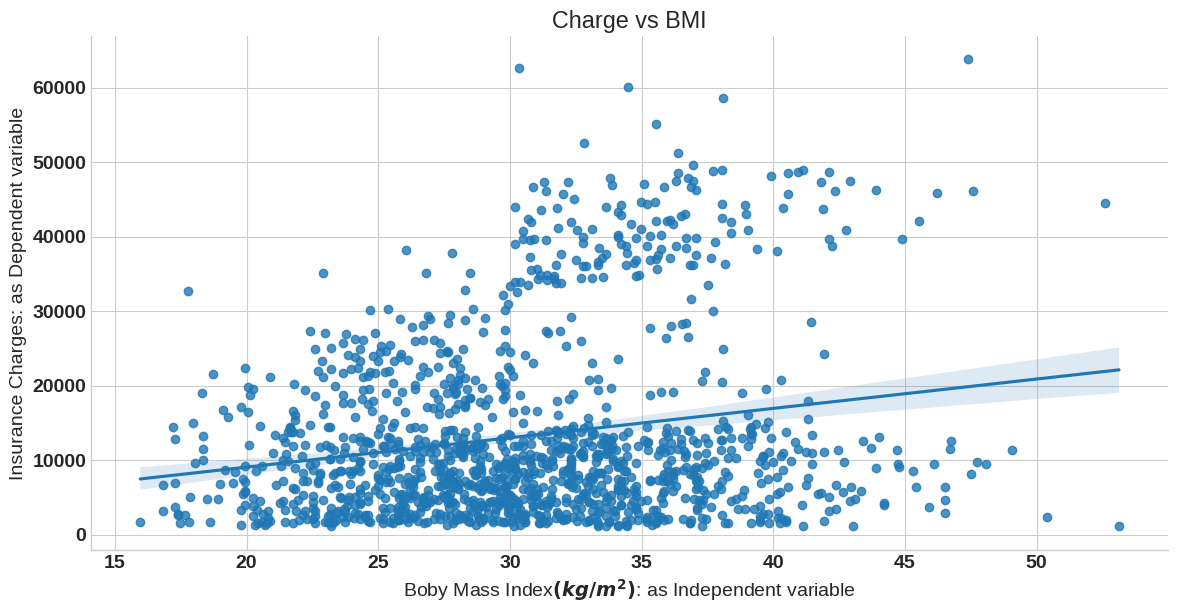

In [83]:
# BMI와 보험료 간의 관계 시각화

sns.lmplot(x='bmi',y = 'charges',data = df,aspect = 2,height = 6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge vs BMI');

BMI가 높을수록 보험료가 증가하는 경향

In [61]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing value in dataset')

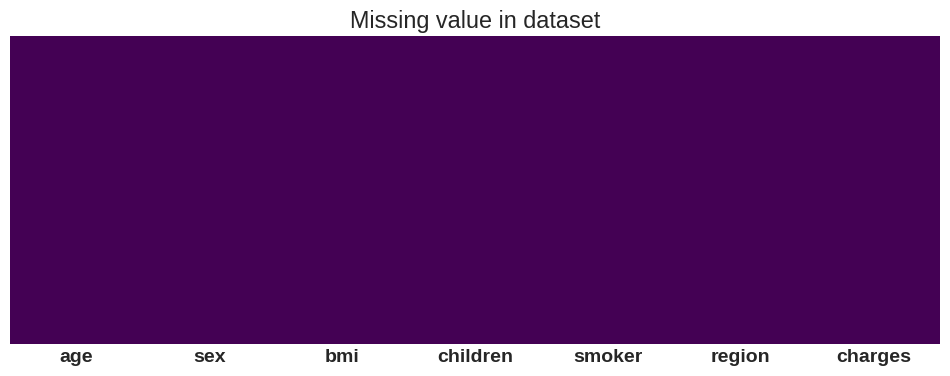

In [62]:
# 누락값 확인
plt.figure(figsize = (12,4))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing value in dataset')

누락값은 없는 것으로 확인

<Axes: >

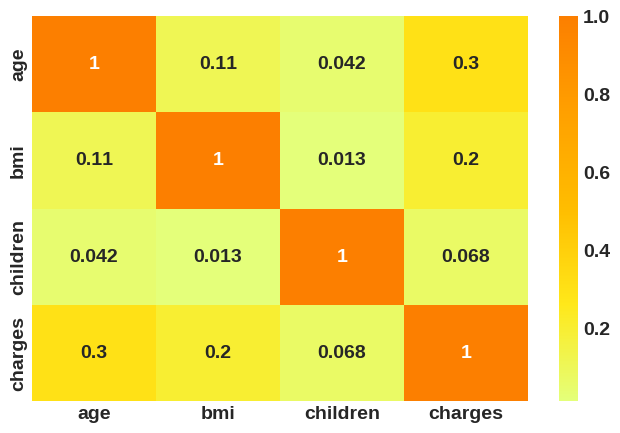

In [63]:
# 상관관계 확인
numeric_df = df.select_dtypes(include = np.number)
corr = numeric_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True)

* charges와 smoker가 가장 높은 상관관계
* bmi, age도 어느 정도 양의 상관관계 존재
* children은 거의 무관계

/tmp/ipython-input-1712851035.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins = 50, color = 'r', ax = ax)
/tmp/ipython-input-1712851035.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']), bins = 40, color = 'b', ax = ax)


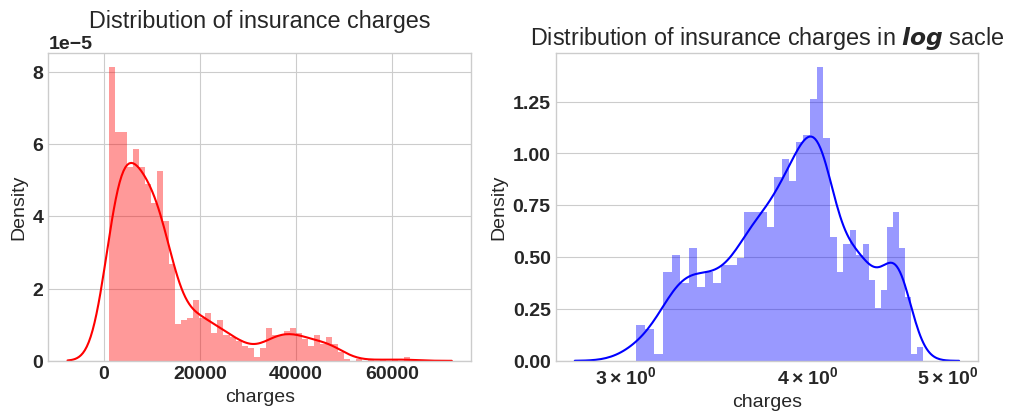

In [64]:
# 의료비 분포
f= plt.figure(figsize = (12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'], bins = 50, color = 'r', ax = ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins = 40, color = 'b', ax = ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

* 왼쪽 그래프를 보면 의료비가 1,120 - 63,500까지 다양하며, 그래프는 오른쪽으로 긴 꼬리를 가짐: 일부 고액의 의료비 존재하는 것으로 볼 수 있음
* 오른쪽 그래프는 의료비에 로그를 취한 것으로, 대략 정규 분포를 나타냄

/tmp/ipython-input-1632171843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'sex', y = 'charges',data = df,palette = 'Wistia',ax = ax)
/tmp/ipython-input-1632171843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'smoker', y = 'charges',data = df,palette = 'magma',ax = ax)


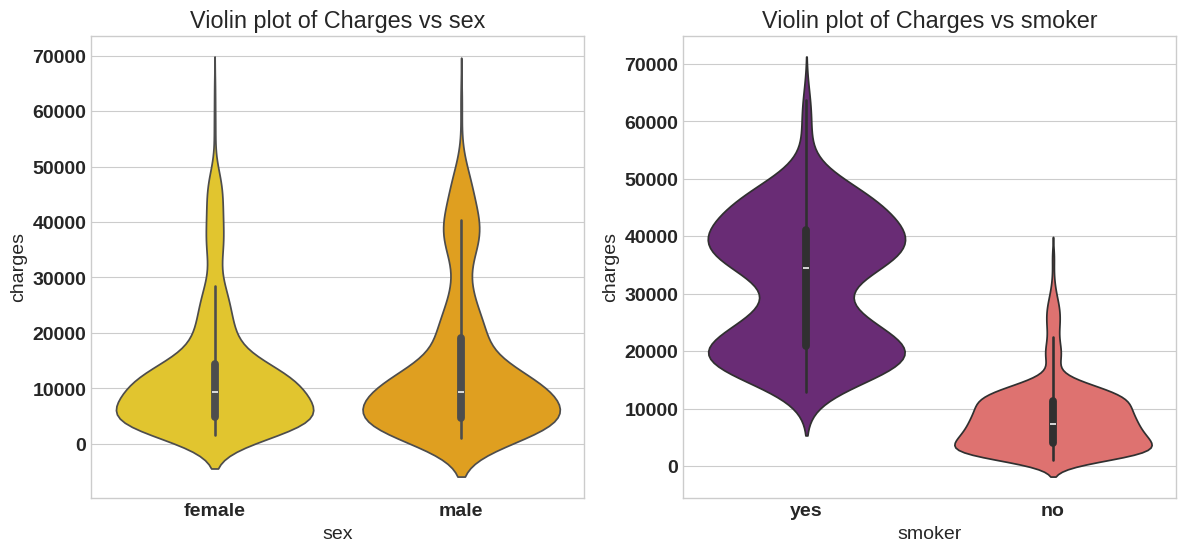

In [65]:
# 성별 vs 의료비 / 흡연 여부 vs 의료비
f = plt.figure(figsize = (14,6))
ax = f.add_subplot(121)
sns.violinplot(x = 'sex', y = 'charges',data = df,palette = 'Wistia',ax = ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x = 'smoker', y = 'charges',data = df,palette = 'magma',ax = ax)
ax.set_title('Violin plot of Charges vs smoker');

* 왼쪽 그림에서 남성과 여성의 의료비는 대략 동일한 범위에 있으며, 평균적으로 약 5,000달러
* 오른쪽 그림에서 흡연자의 의료비는 비흡연자에 비해 훨씬 넓은 범위 있는 것을 확인 가능
* 비흡연자의 평균 의료비는 약 5,000달러, 흡연자의 최소 의료비가 5,000달러

Text(0.5, 1.0, 'Box plot od Charges vs Children')

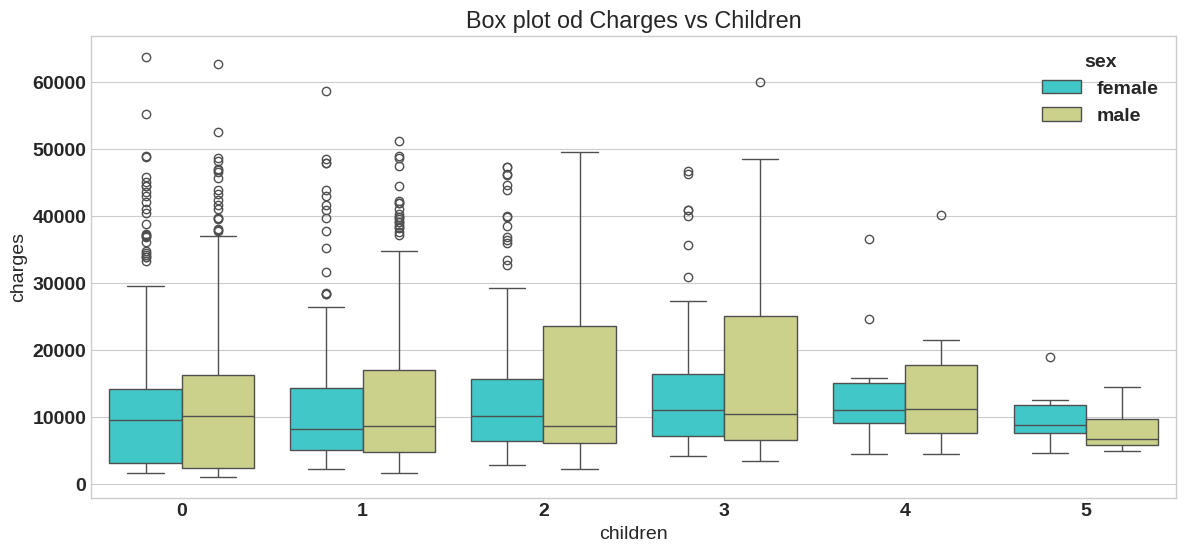

In [66]:
# 어린이 vs 의료비 box plot
plt.figure(figsize = (14,6))
sns.boxplot(x = 'children', y = 'charges', hue = 'sex', data = df, palette = 'rainbow')
plt.title('Box plot od Charges vs Children')

In [67]:
df.groupby('children')['charges'].agg(['mean','min','max'])

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


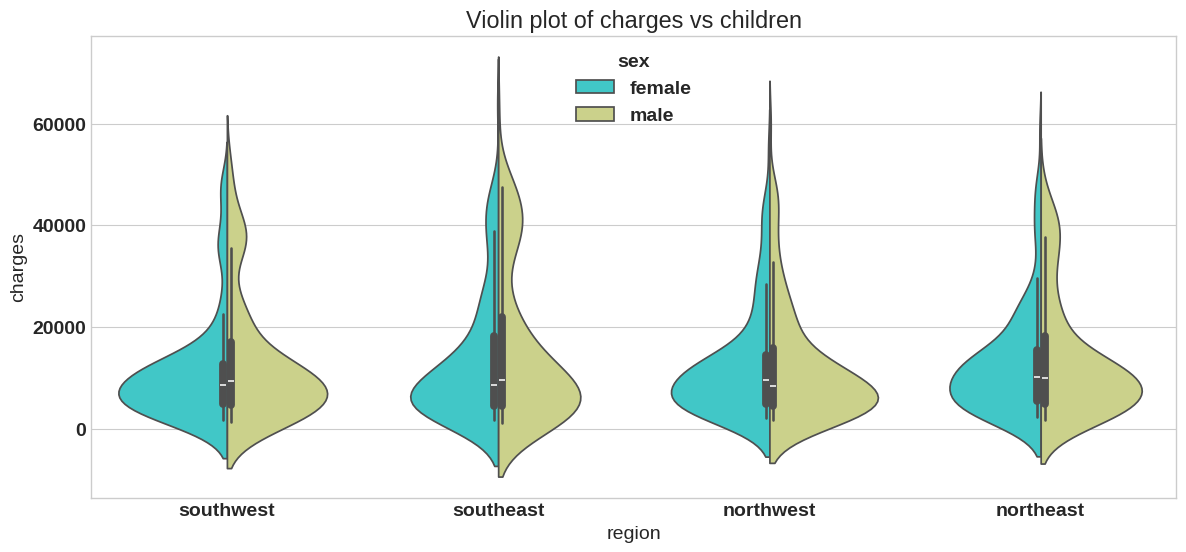

In [68]:
plt.figure(figsize = (14,6))
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'rainbow', split=True)
plt.title('Violin plot of charges vs children');

* 지역별 보혐료 차이는 미미함
* 일부 이상치가 확인되지만, 지역보다는 다른 변수 영향이 큼

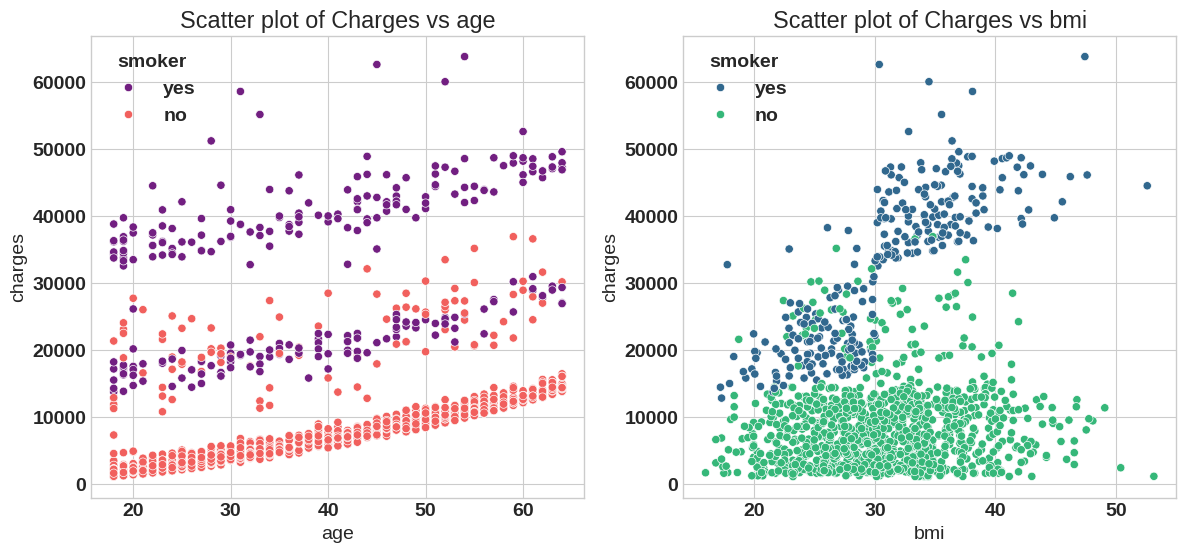

In [69]:
f = plt.figure(figsize = (14,6))
ax = f.add_subplot(121)
sns.scatterplot(x = 'age', y = 'charges', data = df, palette = 'magma', hue = 'smoker', ax = ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x = 'bmi', y = 'charges', data = df, palette = 'viridis', hue = 'smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

* 왼쪽 그래프는 나이와 의료비를 비교한 것으로, 보험에 가입된 최소 연령은 18세로 확인
* 비흡연자는 대부분이 0 - 30,000 사이에 분포, 흡연자는 10,000 - 50,000, 그 이상까지 분포

* 오른쪽 그래프는 BMI와 의료비를 비교한 것으로, 최소 16, 최대 54인 것으로 확인
* BMI 지수 높고 흡연까지 하면 보험료가 높은 것을 확인 할 수 있음

# **2. 데이터 전처리**

In [70]:
# dummie 변수 - 원핫인코딩을 통해 범주형 데이터를 0 또는 1의 숫자형 데이터로 변환
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep = '_', columns = categorical_columns, drop_first = True, dtype = 'int8')

In [71]:
print('Columns in original data frame: \n', df.columns.values)
print('\nNumber of rows and columns in the dataset:', df.shape)
print('\nColumns in data frame after encoding dummy variable: \n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame: 
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable: 
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [72]:
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['charges'], alpha = 0.05)

# df['charge'] = y_bc
# 이 모델에서 더 잘 작동하는 건 아니므로, 로그 변환 해서 사용
ci, lam

((-0.011402906172930048, 0.09880968597673512),
 np.float64(0.043649061187374535))

In [73]:
# 로그 변환
df_encode['charges'] = np.log(df_encode['charges'])

# **3. 훈련용 / 테스트용 데이터 분리**

In [74]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis = 1) # 독립 변수
y = df_encode['charges'] # 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

* charges를 y (종속변수), 나머지를 X(독립변수)로 지정
* 훈련 : 테스터 = 7 : 3으로 분리
* random_stats = 23으로 재현성 확보

# **4. 모델 구축**

In [75]:
# 1. 모든 샘플의 첫 번째 컬럼에 1 추가 - 절편항을 계산하기 위해
X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# 2. 모델 구축
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

In [76]:
# 선형 회귀 모델을 위한 파라미터
parameter = ['theta_' + str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect: x_0 = 1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter': parameter, 'Columns': columns, 'theta': theta})

In [77]:
# sckit learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # x_0 = 1은 추가할 필요 없지만, sklearn은 이걸 다룸

# parameter
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name = 'Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect: x_0 = 1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


두 모델에서 얻은 매개 변수는 동일하므로 정규 방정식을 사용하여 모델을 구축하고 sklearn 선형 회귀 모듈을 사용해 검증

# **5. 모델 예측**

In [78]:
# 일반식
y_pred_norm = np.matmul(X_test_0, theta)

# 평가: MSE
J_mes = np.sum((y_pred_norm - y_test) ** 2) / X_test_0.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test) ** 2)
sst = np.sum((y_test - y_test.mean()) ** 2)

R_suqare = 1- (sse / sst)
print('The Mean Square Error(MSE) or J(theta) is:', J_mes)
print('R_square obtain for normal equation method is: ', R_suqare)

The Mean Square Error(MSE) or J(theta) is: 0.18729622322982065
R_square obtain for normal equation method is:  0.7795687545055299


In [79]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298189
R square obtain for scikit learn library is : 0.7795687545055319


* 이 모델은 약 77.96%의 R^2 값을 반환하므로 데이터 테스트에 매우 잘 맞는 것을 확인 할 수 있음

# **6. 모델 확인**

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

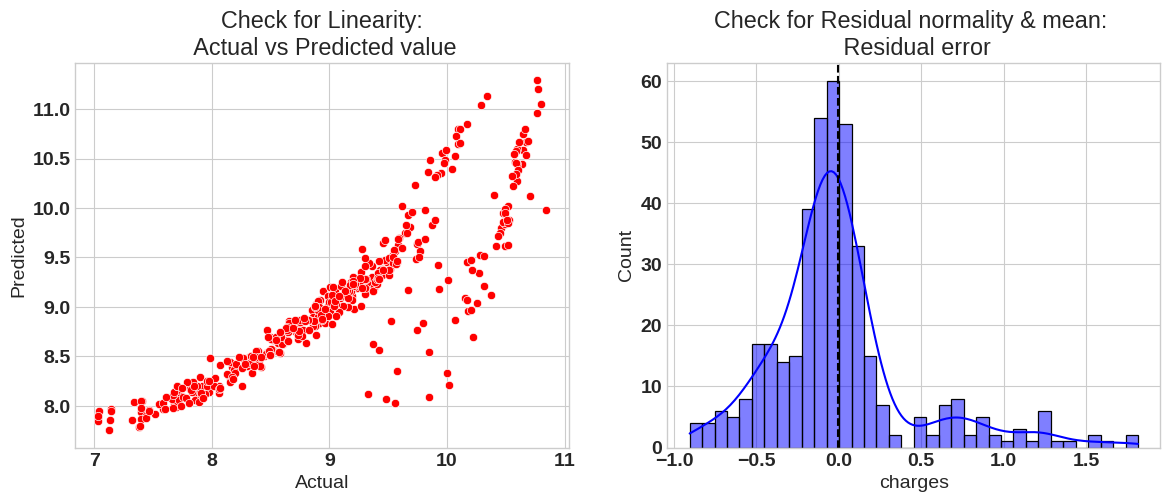

In [80]:
# 선형 확인
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sk})
sns.scatterplot(x='Actual', y='Predicted', data=plot_data, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual vs Predicted value')

# 잔차 정규성 및 평균
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

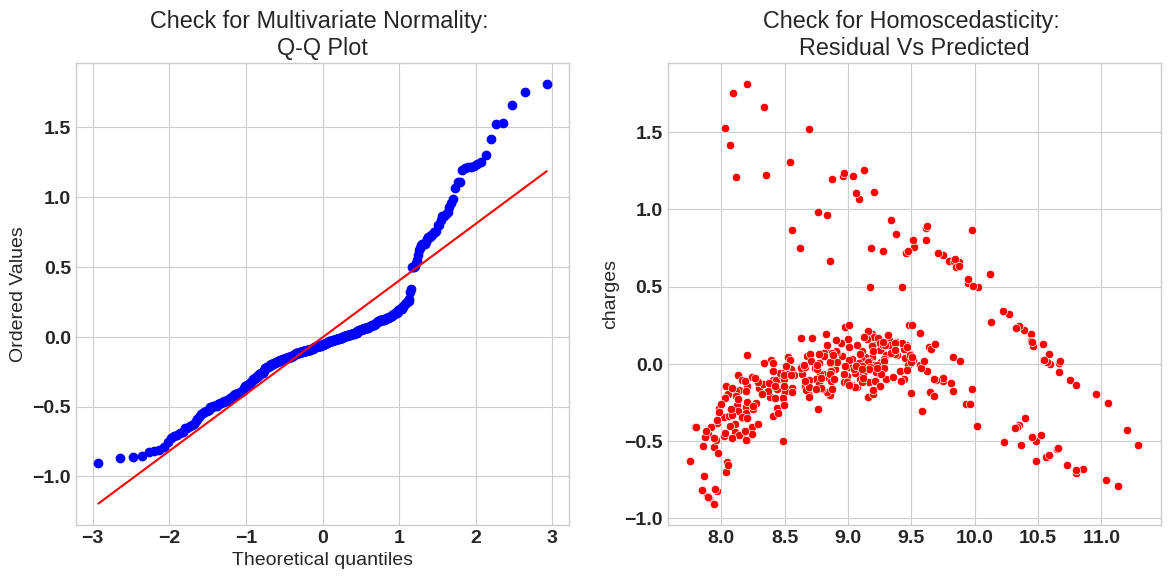

In [81]:
# Q-Q plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

In [82]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138

* 이 모델에서 실제 그래프와 예측 그래프는 곡선이므로 선형 가정에 실패
* 잔차 평균은 0이고, 잔차 오차 플롯은 오른쪽으로 치우쳐 있음
* Q-Q plot은 1.5보다 큰 값 로그 값이 증가하는 추세로 나타남
* 그래프는 이분산성을 나타내며, 특정 지점 이후에는 오차가 완화됨
* 분산 인플레이션 계수 값이 5보다 작으므로 다중공선성은 없음

**회고**
필사를 진행하면서 오류도 몇 번 나고, 계산된 결과값이 아주 미미하게 차이가 나는 것을 확인. 하지만 소수점 몇 자리 이하에서 발생한 차이라 전체 결과에 영향을 미치지 않을 것으로 판단하고 계속 진행하였음. 진행하면서 이해가 잘 가지 않는 부분도 존재하였고, 이전 기초 통계 노드 학습 할 때도 느꼈지만, ADsP 자격증을 준비할 때 공부했던 내용들을 상당 부분 잊은 것 같아 다시 공부할 필요가 있다고 느꼈음. -> 코딩을 한다고 해도 출력된 결과값을 해석할 수 있어야 하기 때문!